# 1. Simple Setting
- 10 investment strategies: randomly assign to people

In [6]:
#upgrade scipy
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 25.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1


In [1]:
import numpy as np

def simulate_society(num_people, interest_rate, scaling_factor, iteration_time):
    # Initialize the society
    m = 100.0  # Starting money for each person
    wealth = np.full(num_people, m)  # Initial wealth for all people

    # Generate random investment strategy type for each person (0 for conservative, 1 for moderate, 2 for aggressive)
    investment_strategy = np.random.randint(0, 10, num_people)

    # Assign investment ratio based on strategy type
    strategies = {
        0: {"name": "s1", "ratio": 0},
        1: {"name": "s2", "ratio": 0.1},
        2: {"name": "s3", "ratio": 0.2},
        3: {"name": "s4", "ratio": 0.3},
        4: {"name": "s5", "ratio": 0.4},
        5: {"name": "s6", "ratio": 0.5},
        6: {"name": "s7", "ratio": 0.6},
        7: {"name": "s8", "ratio": 0.7},
        8: {"name": "s9", "ratio": 0.8},
        9: {"name": "s10", "ratio": 0.9},
        10: {"name": "s11", "ratio": 1}

    }

    investment_ratio = np.array([strategies[strategy]["ratio"] for strategy in investment_strategy])

    # Lists to store wealth distribution after each round
    wealth_distribution = [wealth.copy()]

    # Run simulation for 'iteration_time' rounds
    for _ in range(iteration_time):
        # Calculate investment and consumption amount for each person
        investment_amount = investment_ratio * wealth

        total_consumption = np.sum((1 - investment_ratio) * wealth)
        consumption_amount = np.full(num_people, total_consumption / num_people)

        # Simulate investment and update wealth
        investment_returns = np.random.normal(interest_rate, scaling_factor * interest_rate, num_people)
        wealth += investment_amount * investment_returns

        # Calculate consumption and update wealth
        wealth -= investment_amount
        wealth += consumption_amount

        # Ensure wealth is non-negative
        wealth = np.maximum(wealth, 0)

        # Store the wealth distribution after each round
        wealth_distribution.append(wealth.copy())

    return wealth_distribution

In [6]:
import plotly

# plot the wealth distribution for each round

def plot_wealth_distribution(wealth_distribution):

    # Create figure
    fig = plotly.graph_objects.Figure()

    # Add traces, one for each slider step
    for wealth in wealth_distribution:
        fig.add_trace(
            plotly.graph_objects.Histogram(x=wealth, nbinsx=100, histnorm='probability density', visible=False))
        
    # Make 10th trace visible
    fig.data[10].visible = True

    # Create and add slider
    steps = []
    for i in range(len(fig.data)):

        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data)},
                {"title": "Wealth Distribution for Round " + str(i)}],  # layout attribute
        )
        step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=10,
        currentvalue={"prefix": "Round: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders,
        width=800,
        height=600,
    )

    fig.show()

# 1.1 scaling_factor = 0.5

In [9]:
num_people = 100
interest_rate = 0.05
scaling_factor = 0.5
iteration_time = 100

wealth_distribution = simulate_society(num_people, interest_rate, scaling_factor, iteration_time)
plot_wealth_distribution(wealth_distribution)

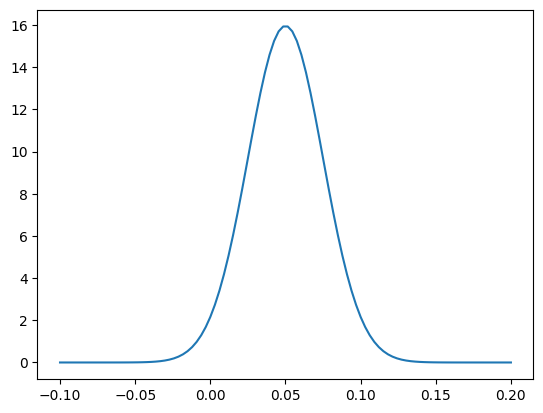

In [10]:
# plot the normal distribution interest return
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-0.1, 0.2, 100)
y = stats.norm.pdf(x, interest_rate,  scaling_factor * interest_rate)
plt.plot(x, y)
plt.show()

# 1.2 scaling_factor = 0 (no risk)

In [11]:
num_people = 100
interest_rate = 0.05
scaling_factor = 0
iteration_time = 100

wealth_distribution = simulate_society(num_people, interest_rate, scaling_factor, iteration_time)
plot_wealth_distribution(wealth_distribution)

# 2. Advanced Model

In [23]:
import numpy as np
import matplotlib.pyplot as plt

class InvestmentSimulation:
    def __init__(self, num_people, interest_rate, scaling_factor, iteration_time):
        self.num_people = num_people
        self.interest_rate = interest_rate
        self.scaling_factor = scaling_factor
        self.iteration_time = iteration_time
        self.wealth_distribution = None

    def assign_investment_types(self):
        # Define the investment strategies
        strategies = [
            {"name": "Conservative", "ratio": 0.1},
            {"name": "Moderate 1", "ratio": 0.2},
            {"name": "Moderate 2", "ratio": 0.3},
            {"name": "Moderate 3", "ratio": 0.4},
            {"name": "Moderate 4", "ratio": 0.5},
            {"name": "Aggressive 1", "ratio": 0.6},
            {"name": "Aggressive 2", "ratio": 0.7},
            {"name": "Aggressive 3", "ratio": 0.8},
            {"name": "Aggressive 4", "ratio": 0.9},
            {"name": "Aggressive 5", "ratio": 1.0},
        ]

        # Calculate the Pareto weights based on strategy ratios
        ratios = np.array([strategy["ratio"] for strategy in strategies])
        weights = 1 / ratios
        pareto_weights = weights / np.sum(weights)

        # Use the Pareto weights to assign investment strategies to individuals
        investment_strategy = np.random.choice(len(strategies), size=self.num_people, p=pareto_weights)
        
        self.investment_ratio = np.array([strategies[strategy]["ratio"] for strategy in investment_strategy])

        return self.investment_ratio

    def simulate_society(self):
        # Initialize the society
        m = 100.0  # Starting money for each person
        wealth = np.full(self.num_people, m)  # Initial wealth for all people

        # Generate investment strategy type for each person using random choice
        investment_ratio = self.assign_investment_types()

        # Lists to store wealth distribution after each round
        wealth_distribution = [wealth.copy()]

        # Run simulation for 'iteration_time' rounds
        for _ in range(self.iteration_time):
            # Calculate total consumption amount for the round
            total_consumption = np.sum((1 - investment_ratio) * wealth)

            # Calculate investment and consumption amount for each person
            investment_amount = investment_ratio * wealth
            consumption_amount = np.full(self.num_people, total_consumption / self.num_people)

            # Simulate investment and update wealth
            investment_returns = np.random.normal(self.interest_rate, self.scaling_factor * self.interest_rate, self.num_people)
            wealth += investment_amount * investment_returns

            # Calculate consumption and update wealth
            wealth -= investment_amount
            wealth += consumption_amount

            # Ensure wealth is non-negative
            wealth = np.maximum(wealth, 0)

            # Store the wealth distribution after each round
            wealth_distribution.append(wealth.copy())

        self.wealth_distribution = wealth_distribution

    def plot_wealth_distribution(self):

        fig = plotly.graph_objects.Figure()

        # Add traces, one for each slider step
        for wealth in self.wealth_distribution:
            fig.add_trace(
                plotly.graph_objects.Histogram(x=wealth, nbinsx=100, histnorm='probability density', visible=False))
            
        # Make 10th trace visible
        fig.data[10].visible = True

        # Create and add slider
        steps = []
        for i in range(len(fig.data)):

            step = dict(
                method="update",
                args=[{"visible": [False] * len(fig.data)},
                    {"title": "Wealth Distribution for Round " + str(i)}],  # layout attribute
            )
            step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
            steps.append(step)

        sliders = [dict(
            active=10,
            currentvalue={"prefix": "Round: "},
            pad={"t": 50},
            steps=steps
        )]

        fig.update_layout(
            sliders=sliders,
            width=800,
            height=600,
        )

        fig.show()


In [24]:
if __name__ == "__main__":
    num_people = 100
    interest_rate = 0.05
    scaling_factor = 0.5
    iteration_time = 100

    simulation = InvestmentSimulation(num_people, interest_rate, scaling_factor, iteration_time)
    simulation.simulate_society()
    simulation.plot_wealth_distribution()

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [22]:
simulation.wealth_distribution

[array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100.]),
 array([68.37709408, 97.17629095, 88.00353236, 28.58699276, 68.33432175,
        78.02118753, 58.86083298, 68.57022216, 77.33889538, 39.05145267,
        88.25857967, 97.37452198, 24.86721245, 97.00630922, 33.76765107,
        77.95545701, 97.50529805, 59.76481702, 97.41243058, 96.96850963,
        87.63969653, 78.37